<a href="https://colab.research.google.com/github/Mahirweyves/Anyesi-Residence-Inn/blob/main/Big_Data_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: create spark session from pyspark

!pip install pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ColabSpark") \
    .getOrCreate()

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/BigData/city_temperature.csv"
try:
    spark_df = spark.read.csv(file_path, header=True, inferSchema=True)
    spark_df.show(5)  # Display the first 5 rows of the DataFrame
except Exception as e:
    print(f"An error occurred while reading the CSV file with PySpark: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+------+-------+-----+-------+-----+---+----+--------------+
|Region|Country|State|   City|Month|Day|Year|AvgTemperature|
+------+-------+-----+-------+-----+---+----+--------------+
|Africa|Algeria| NULL|Algiers|    1|  1|1995|          64.2|
|Africa|Algeria| NULL|Algiers|    1|  2|1995|          49.4|
|Africa|Algeria| NULL|Algiers|    1|  3|1995|          48.8|
|Africa|Algeria| NULL|Algiers|    1|  4|1995|          46.4|
|Africa|Algeria| NULL|Algiers|    1|  5|1995|          47.9|
+------+-------+-----+-------+-----+---+----+--------------+
only showing top 5 rows



In [ ]:
filtered_by_year_df = spark_df.filter((spark_df["Year"] >= 1995) & (spark_df["Year"] <= 2020))
filtered_by_year_df.show(5)

+------+-------+-----+-------+-----+---+----+--------------+
|Region|Country|State|   City|Month|Day|Year|AvgTemperature|
+------+-------+-----+-------+-----+---+----+--------------+
|Africa|Algeria| NULL|Algiers|    1|  1|1995|          64.2|
|Africa|Algeria| NULL|Algiers|    1|  2|1995|          49.4|
|Africa|Algeria| NULL|Algiers|    1|  3|1995|          48.8|
|Africa|Algeria| NULL|Algiers|    1|  4|1995|          46.4|
|Africa|Algeria| NULL|Algiers|    1|  5|1995|          47.9|
+------+-------+-----+-------+-----+---+----+--------------+
only showing top 5 rows



In [ ]:

print(f"Number of rows in the DataFrame: {filtered_by_year_df.count()}")
print(f"Number of rows in the DataFrame: {spark_df.count()}")

Number of rows in the DataFrame: 2905887
Number of rows in the DataFrame: 2906327


In [ ]:
filtered_by_temp = spark_df.filter((filtered_by_year_df["AvgTemperature"] >= -93) & (filtered_by_year_df["AvgTemperature"] <= 158))
print(f"Number of rows in the DataFrame: {filtered_by_temp.count()}")

Number of rows in the DataFrame: 2826655


In [ ]:
# import matplotlib.pyplot as plt
# # Assuming 'filtered_by_year_df' is your Spark DataFrame
# # Convert the Spark DataFrame to a Pandas DataFrame for easier plotting
# pandas_df = filtered_by_year_df.toPandas()

# # Create the plot
# plt.figure(figsize=(12, 6))
# plt.hist(pandas_df['Year'], bins=20, edgecolor='black')
# plt.xlabel('Year')
# plt.ylabel('Frequency')
# plt.title('Distribution of Data by Year')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

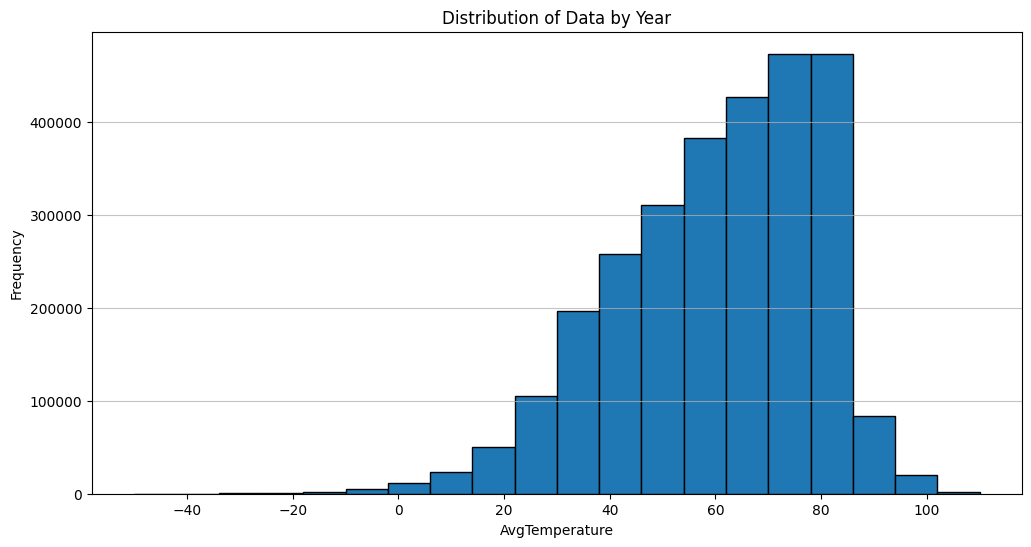

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'filtered_by_year_df' is your Spark DataFrame
# Convert the Spark DataFrame to a Pandas DataFrame for easier plotting
pandas_df = filtered_by_temp.toPandas()

# Create the plot
plt.figure(figsize=(12, 6))
plt.hist(pandas_df['AvgTemperature'], bins=20, edgecolor='black')
plt.xlabel('AvgTemperature')
plt.ylabel('Frequency')
plt.title('Distribution of Data by Year')
plt.grid(axis='y', alpha=0.75)
plt.show()

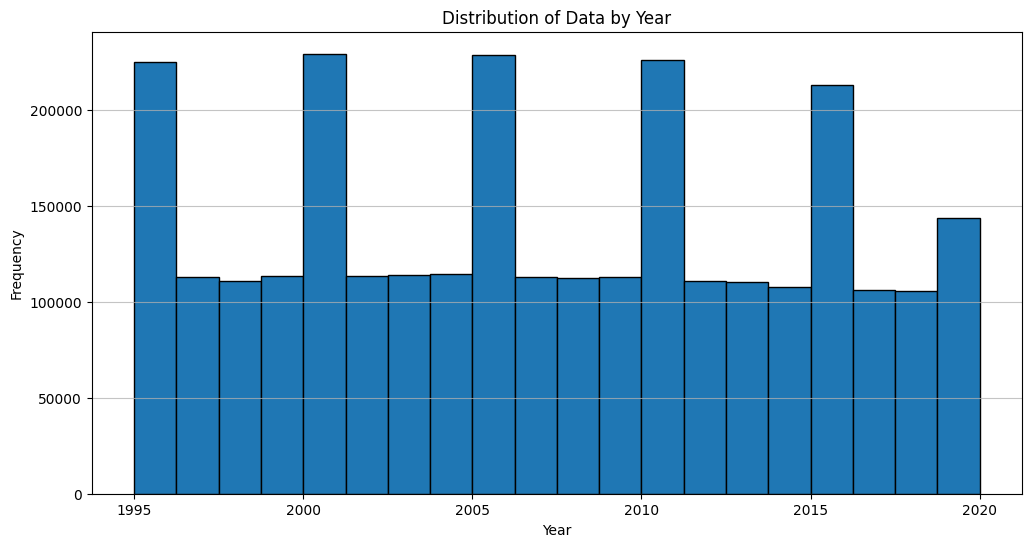

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(pandas_df['Year'], bins=20, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Data by Year')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
from pyspark.ml.feature import StringIndexer

# Assuming spark_df is your Spark DataFrame
# Create StringIndexer objects for each categorical column
indexer_region = StringIndexer(inputCol="Region", outputCol="RegionIndex")
indexer_country = StringIndexer(inputCol="Country", outputCol="CountryIndex")
indexer_city = StringIndexer(inputCol="City", outputCol="CityIndex")

# Fit and transform the categorical columns
spark_df = indexer_region.fit(spark_df).transform(spark_df)
spark_df = indexer_country.fit(spark_df).transform(spark_df)
spark_df = indexer_city.fit(spark_df).transform(spark_df)

# Drop the original string columns
spark_df = spark_df.drop("Region", "Country", "City")

# Show the encoded DataFrame
spark_df.show(5)

+-----+-----+---+----+--------------+-----------+------------+---------+
|State|Month|Day|Year|AvgTemperature|RegionIndex|CountryIndex|CityIndex|
+-----+-----+---+----+--------------+-----------+------------+---------+
| NULL|    1|  1|1995|          64.2|        3.0|        28.0|     16.0|
| NULL|    1|  2|1995|          49.4|        3.0|        28.0|     16.0|
| NULL|    1|  3|1995|          48.8|        3.0|        28.0|     16.0|
| NULL|    1|  4|1995|          46.4|        3.0|        28.0|     16.0|
| NULL|    1|  5|1995|          47.9|        3.0|        28.0|     16.0|
+-----+-----+---+----+--------------+-----------+------------+---------+
only showing top 5 rows



In [ ]:
# Move 'AvgTemperature' to the last column
columns = spark_df.columns
columns.remove('AvgTemperature')
columns.append('AvgTemperature')
spark_df = spark_df.select(columns)

# Show the updated DataFrame
spark_df.show(5)

+-----+-----+---+----+-----------+------------+---------+--------------+
|State|Month|Day|Year|RegionIndex|CountryIndex|CityIndex|AvgTemperature|
+-----+-----+---+----+-----------+------------+---------+--------------+
| NULL|    1|  1|1995|        3.0|        28.0|     16.0|          64.2|
| NULL|    1|  2|1995|        3.0|        28.0|     16.0|          49.4|
| NULL|    1|  3|1995|        3.0|        28.0|     16.0|          48.8|
| NULL|    1|  4|1995|        3.0|        28.0|     16.0|          46.4|
| NULL|    1|  5|1995|        3.0|        28.0|     16.0|          47.9|
+-----+-----+---+----+-----------+------------+---------+--------------+
only showing top 5 rows



In [ ]:
# Drop the 'State' column
spark_df = spark_df.drop("State")

spark_df.show(5)

+-----+---+----+-----------+------------+---------+--------------+
|Month|Day|Year|RegionIndex|CountryIndex|CityIndex|AvgTemperature|
+-----+---+----+-----------+------------+---------+--------------+
|    1|  1|1995|        3.0|        28.0|     16.0|          64.2|
|    1|  2|1995|        3.0|        28.0|     16.0|          49.4|
|    1|  3|1995|        3.0|        28.0|     16.0|          48.8|
|    1|  4|1995|        3.0|        28.0|     16.0|          46.4|
|    1|  5|1995|        3.0|        28.0|     16.0|          47.9|
+-----+---+----+-----------+------------+---------+--------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Assemble all features into a single vector column
assembler = VectorAssembler(inputCols=spark_df.columns[:], outputCol="features") # Exclude 'AvgTemperature'
assembled_df = assembler.transform(spark_df)

# Calculate the correlation matrix
correlation = Correlation.corr(assembled_df, "features", "pearson").collect()[0][0]

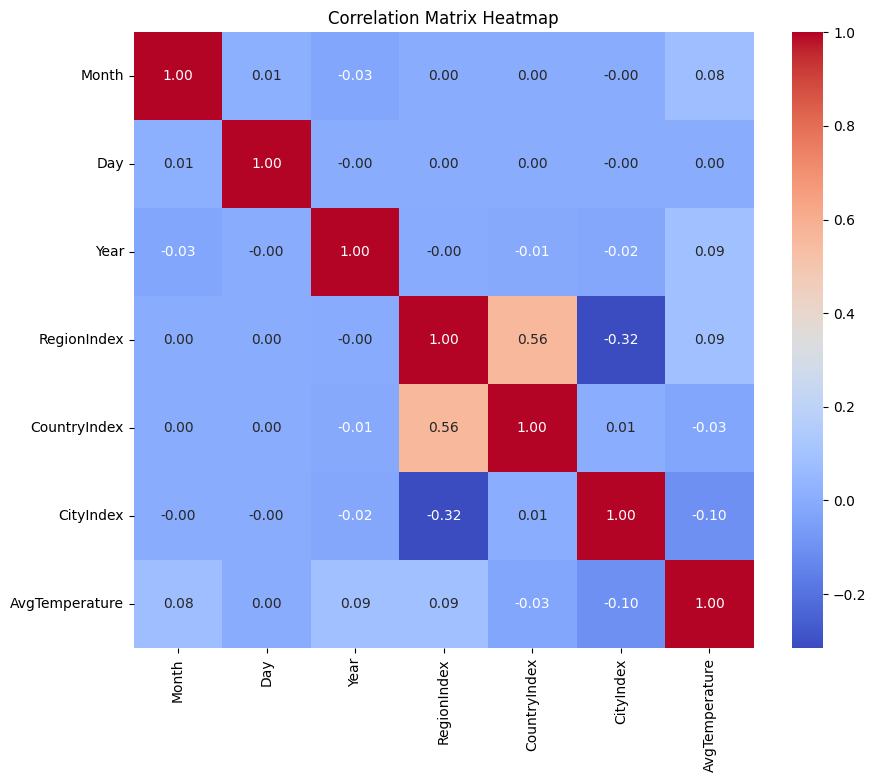

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the correlation matrix to a Pandas DataFrame for visualization
correlation_df = correlation.toArray().tolist()
correlation_df = pd.DataFrame(correlation_df, columns=spark_df.columns[:], index=spark_df.columns[:])


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = spark_df.toPandas()

# Assuming 'AvgTemperature' is the target variable and you want to normalize other columns
features_to_normalize = [col for col in pandas_df.columns if col != 'AvgTemperature']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected features
normalized_features = scaler.fit_transform(pandas_df[features_to_normalize])

# Convert the normalized features back to a Pandas DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features_to_normalize)

# Concatenate the normalized features with the target variable
normalized_df = pd.concat([normalized_df, pandas_df['AvgTemperature']], axis=1)

# Convert the Pandas DataFrame back to a Spark DataFrame (optional)
normalized_spark_df = spark.createDataFrame(normalized_df)

normalized_spark_df.show(5)

+-----+-------------------+------------------+-----------+-------------------+---------+--------------+
|Month|                Day|              Year|RegionIndex|       CountryIndex|CityIndex|AvgTemperature|
+-----+-------------------+------------------+-----------+-------------------+---------+--------------+
|  0.0|0.03225806451612903|0.9862637362637363|        0.5|0.22580645161290322|     0.05|          64.2|
|  0.0|0.06451612903225806|0.9862637362637363|        0.5|0.22580645161290322|     0.05|          49.4|
|  0.0| 0.0967741935483871|0.9862637362637363|        0.5|0.22580645161290322|     0.05|          48.8|
|  0.0|0.12903225806451613|0.9862637362637363|        0.5|0.22580645161290322|     0.05|          46.4|
|  0.0|0.16129032258064516|0.9862637362637363|        0.5|0.22580645161290322|     0.05|          47.9|
+-----+-------------------+------------------+-----------+-------------------+---------+--------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Split the data into training and testing sets (80% train, 20% test)
train_data, test_data = normalized_spark_df.randomSplit([0.8, 0.2], seed=42)

# Create a VectorAssembler to combine features
assembler = VectorAssembler(inputCols=normalized_spark_df.columns[:-1], outputCol="features")
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Initialize and train the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="AvgTemperature")
model = lr.fit(train_data)

# Make predictions on the testing data
predictions = model.transform(test_data)


# Evaluate the model using RMSE
evaluator = RegressionEvaluator(labelCol="AvgTemperature", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Evaluate the model using R-squared
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 31.425427302355697
R-squared: 0.0316642992649242
